# Genetic Algorithms

In [14]:
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:
POPULATION = 100
GENES = 100
GENERATIONS = 100
SEED = 42

np.random.seed(SEED)

pop = np.random.randint(0, 2, size=(POPULATION, GENES))

print(pop.shape)
pop[:10,:10]

(100, 100)


array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1]])

(array([ 7., 14., 16., 20., 14., 13., 12.,  3.,  0.,  1.]),
 array([40. , 42.6, 45.2, 47.8, 50.4, 53. , 55.6, 58.2, 60.8, 63.4, 66. ]),
 <BarContainer object of 10 artists>)

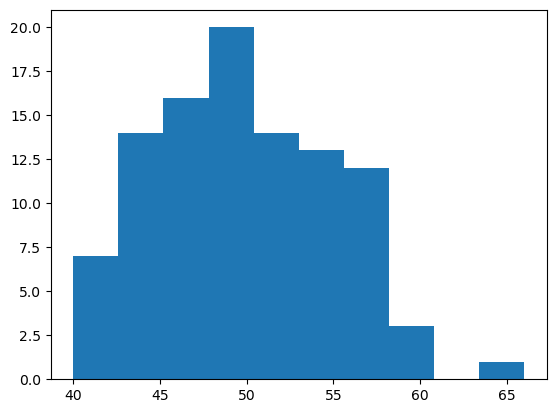

In [4]:
fitness = np.sum(pop, axis=1)

plt.hist(fitness)

In [5]:
def elite_selection(fitness):
    return fitness.argsort()[-2:][::-1]

In [6]:
parents = elite_selection(fitness)
pop[parents[0]]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [8]:
def crossover(parent_1, parent_2, crossover_rate):
    child_1, child_2 = parent_1.copy(), parent_2.copy()
    
    if random.random() < crossover_rate:
        pt = random.randint(1, len(parent_1) - 2)
        
        child_1 = np.concatenate((parent_1[:pt], parent_2[pt:]))
        child_2 = np.concatenate((parent_2[:pt], parent_1[pt:]))
        
    return child_1, child_2

In [9]:
crossover(pop[parents[0]], pop[parents[1]], .5)

(array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]),
 array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]))

In [10]:
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

In [11]:
mutation(pop[parents[0]], .5)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [12]:
def simple_ga(pop, crossover_rate=.5, mutation_rate=.05):
    fitness = np.sum(pop, axis=1)
    
    parents = elite_selection(fitness)
    
    children = np.zeros((POPULATION, GENES))
    
    for i in range(POPULATION):
        offspring = crossover(pop[parents[0]], pop[parents[1]], crossover_rate)
        
        children[i] = mutation(offspring[0], mutation_rate)
        
    return children

In [13]:
simple_ga(pop)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

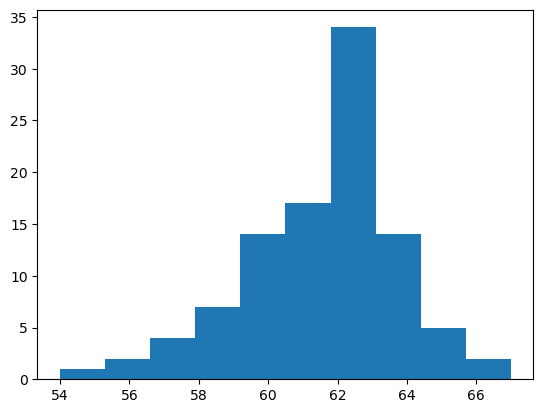

Generation: 1
Max Fitness: 67.0
Min Fitness: 54.0
Mean Fitness: 61.59
Std Fitness: 2.293883170521114


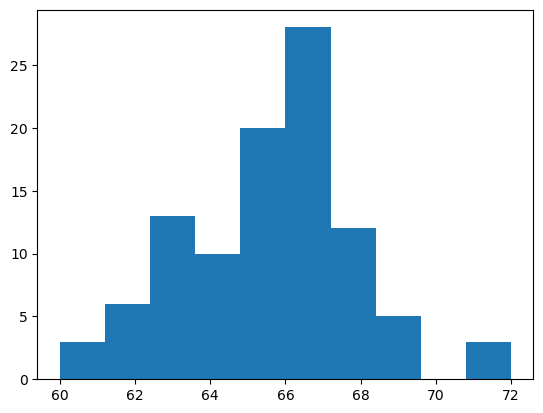

Generation: 2
Max Fitness: 72.0
Min Fitness: 60.0
Mean Fitness: 65.45
Std Fitness: 2.2994564575133833


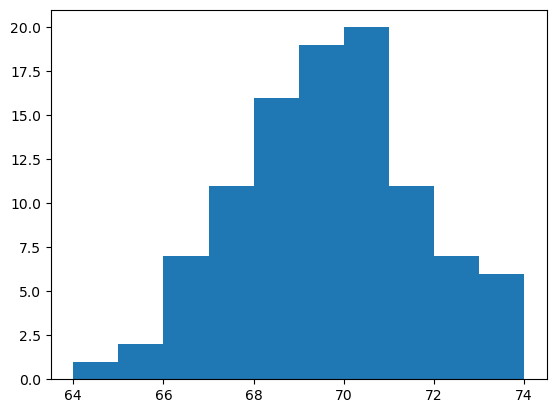

Generation: 3
Max Fitness: 74.0
Min Fitness: 64.0
Mean Fitness: 69.17
Std Fitness: 2.044773826123564


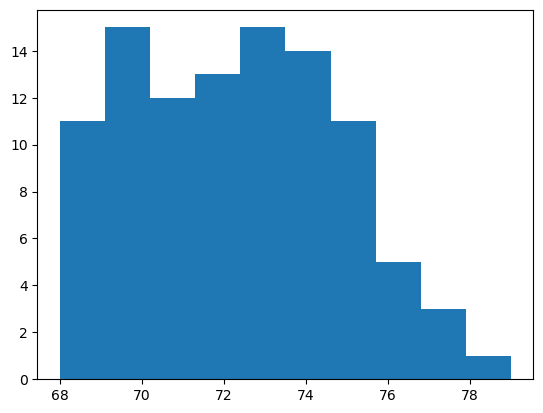

Generation: 4
Max Fitness: 79.0
Min Fitness: 68.0
Mean Fitness: 72.39
Std Fitness: 2.3617578199298928


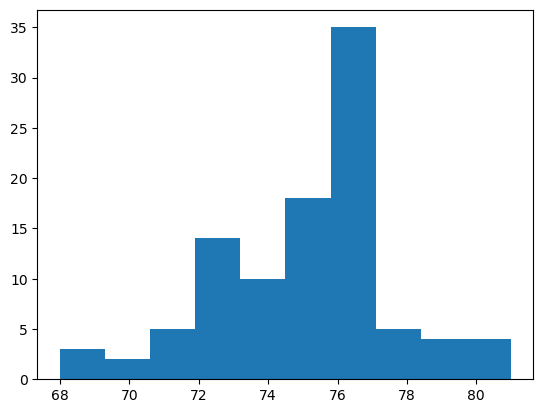

Generation: 5
Max Fitness: 81.0
Min Fitness: 68.0
Mean Fitness: 75.06
Std Fitness: 2.556638417923035


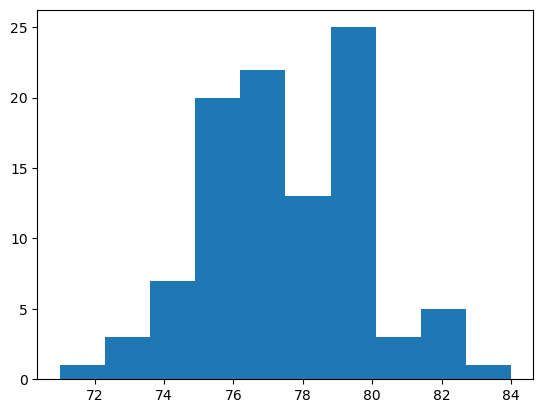

Generation: 6
Max Fitness: 84.0
Min Fitness: 71.0
Mean Fitness: 77.5
Std Fitness: 2.3473389188611002


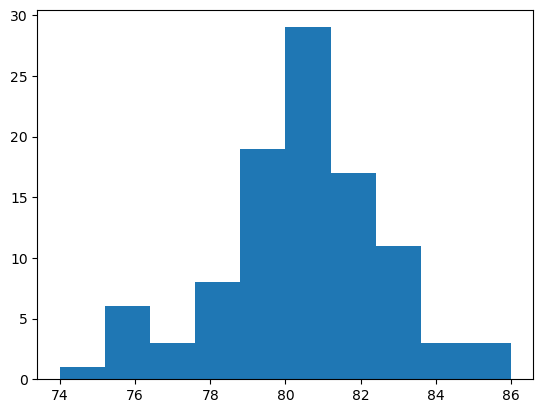

Generation: 7
Max Fitness: 86.0
Min Fitness: 74.0
Mean Fitness: 80.35
Std Fitness: 2.286372673034735


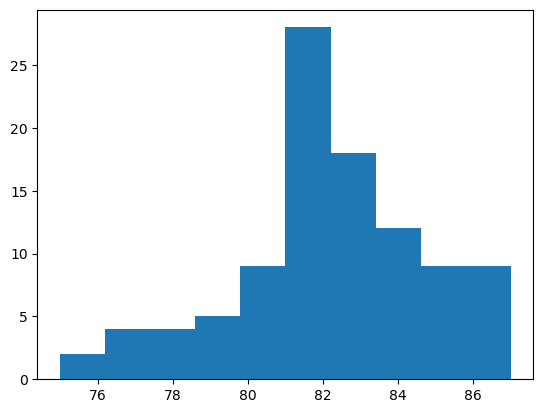

Generation: 8
Max Fitness: 87.0
Min Fitness: 75.0
Mean Fitness: 82.1
Std Fitness: 2.5748786379167465


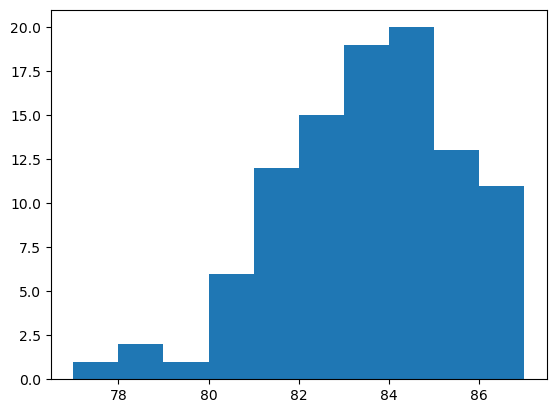

Generation: 9
Max Fitness: 87.0
Min Fitness: 77.0
Mean Fitness: 83.06
Std Fitness: 2.0436242316042352


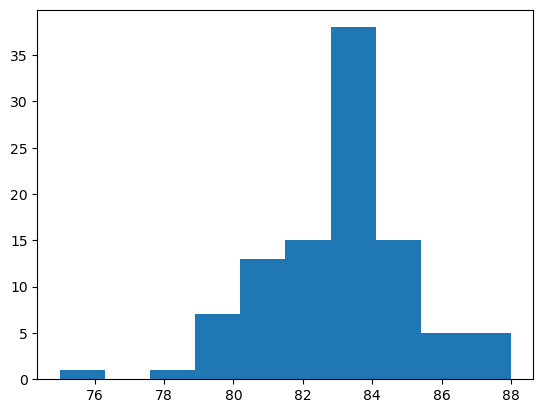

Generation: 10
Max Fitness: 88.0
Min Fitness: 75.0
Mean Fitness: 83.07
Std Fitness: 2.1459496732216254


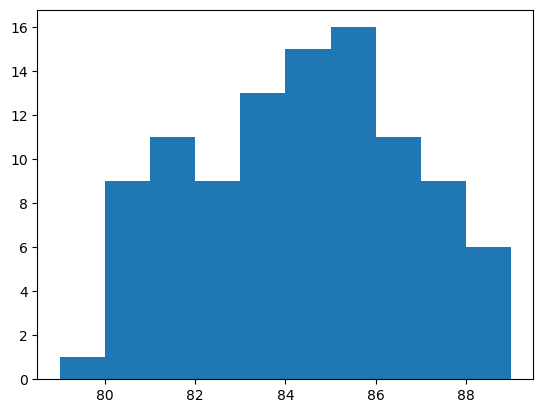

Generation: 11
Max Fitness: 89.0
Min Fitness: 79.0
Mean Fitness: 83.85
Std Fitness: 2.3680160472429232


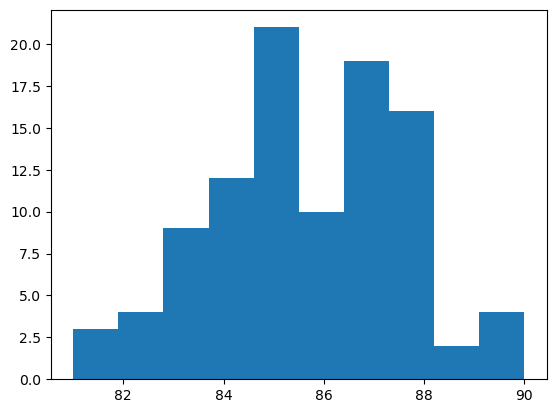

Generation: 12
Max Fitness: 90.0
Min Fitness: 81.0
Mean Fitness: 85.7
Std Fitness: 2.1095023109728985


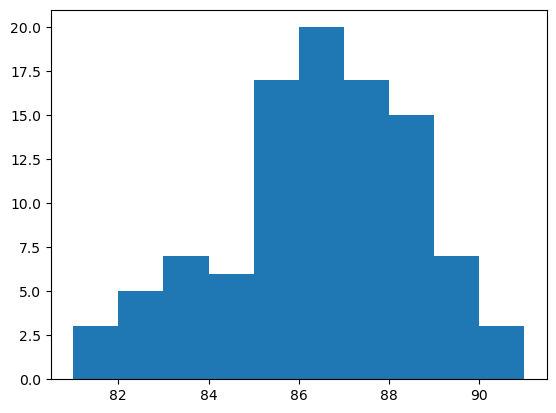

Generation: 13
Max Fitness: 91.0
Min Fitness: 81.0
Mean Fitness: 85.96
Std Fitness: 2.135040983213203


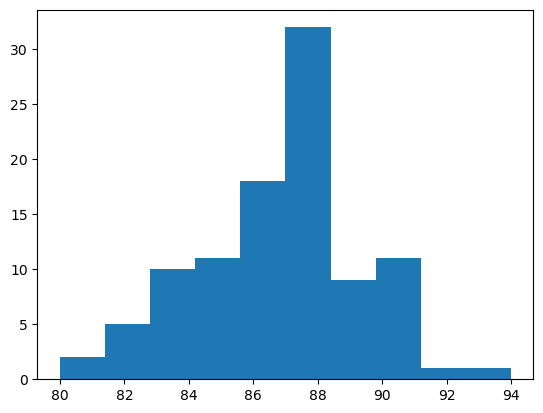

Generation: 14
Max Fitness: 94.0
Min Fitness: 80.0
Mean Fitness: 86.65
Std Fitness: 2.543127995205904


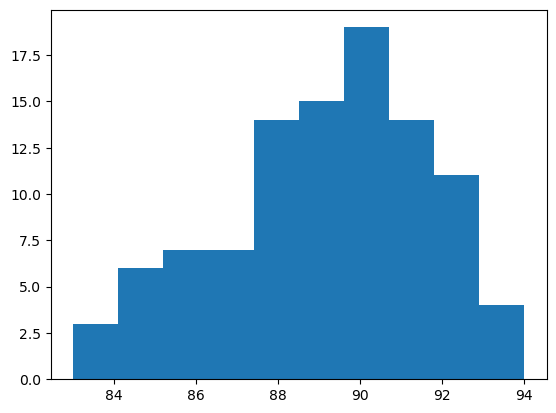

Generation: 15
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.08
Std Fitness: 2.3523605165875403


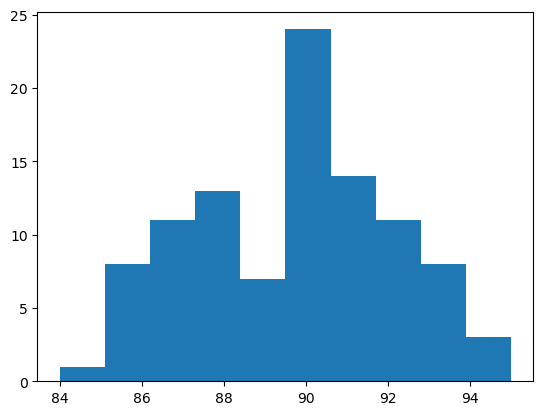

Generation: 16
Max Fitness: 95.0
Min Fitness: 84.0
Mean Fitness: 89.69
Std Fitness: 2.2347035597591014


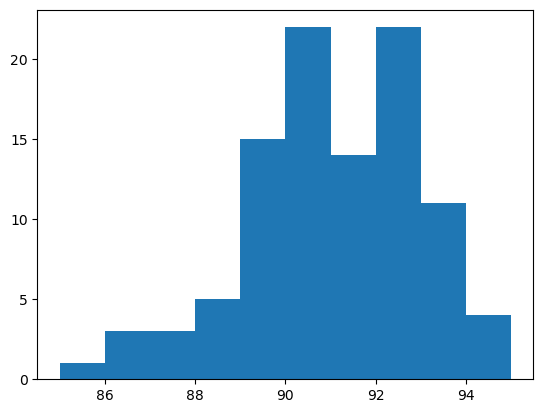

Generation: 17
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 90.58
Std Fitness: 1.9605101376937586


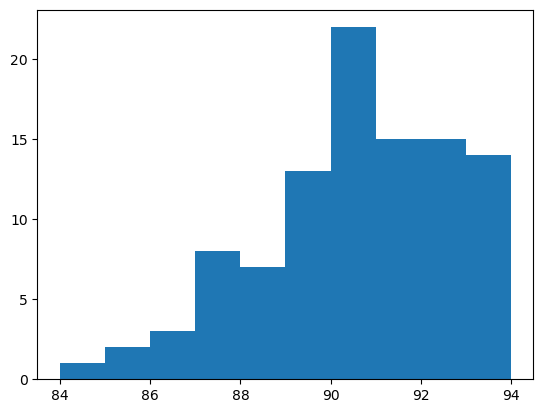

Generation: 18
Max Fitness: 94.0
Min Fitness: 84.0
Mean Fitness: 90.12
Std Fitness: 2.1784398086704164


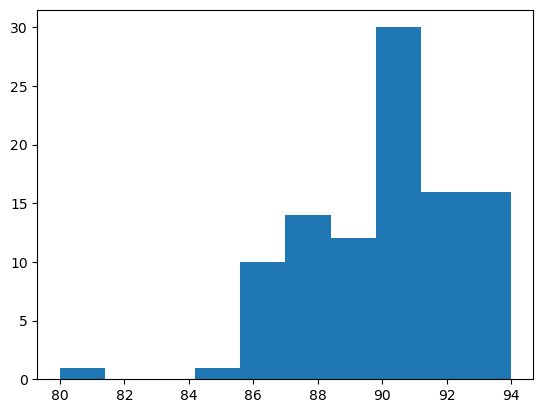

Generation: 19
Max Fitness: 94.0
Min Fitness: 80.0
Mean Fitness: 89.97
Std Fitness: 2.4797378893746007


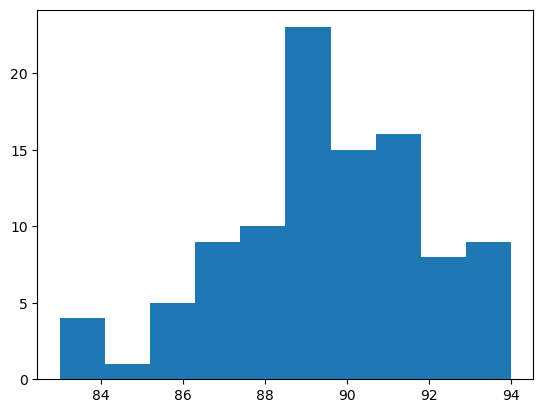

Generation: 20
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.41
Std Fitness: 2.2675757980715883


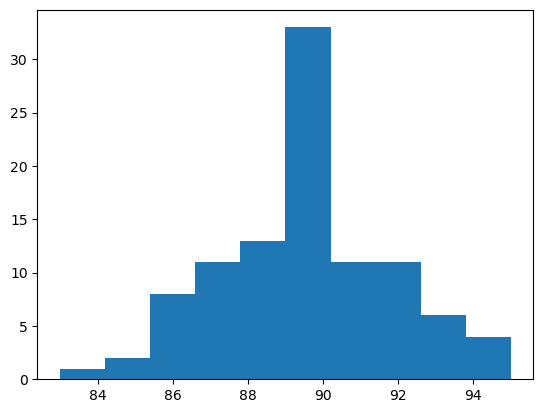

Generation: 21
Max Fitness: 95.0
Min Fitness: 83.0
Mean Fitness: 89.46
Std Fitness: 2.3341807984815572


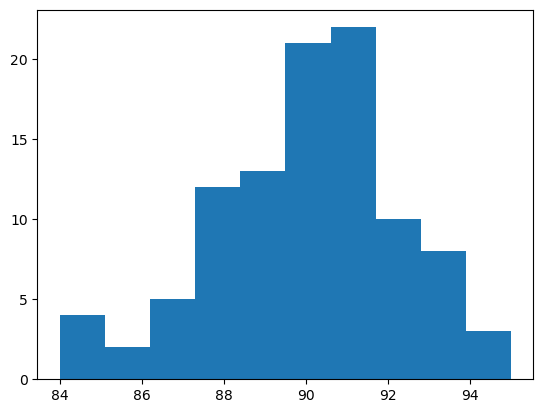

Generation: 22
Max Fitness: 95.0
Min Fitness: 84.0
Mean Fitness: 89.99
Std Fitness: 2.1189384134514153


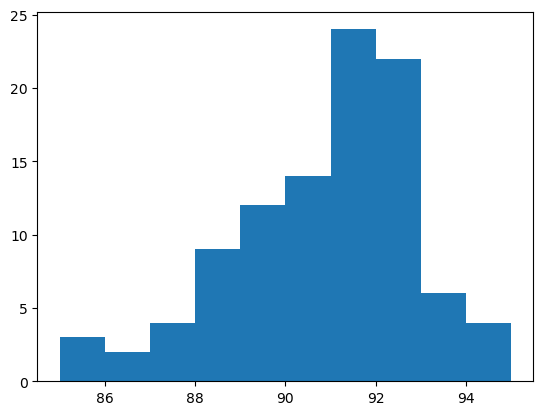

Generation: 23
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 90.38
Std Fitness: 2.0385288813259432


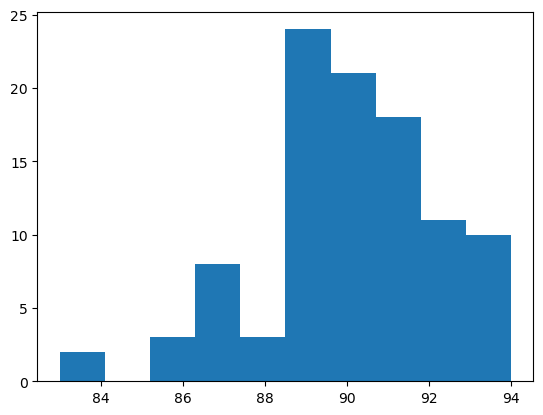

Generation: 24
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.97
Std Fitness: 2.0854495918146765


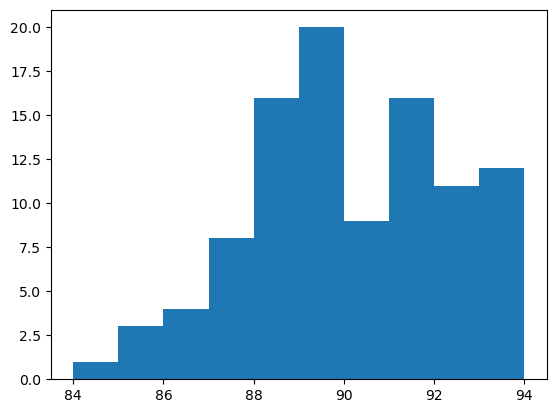

Generation: 25
Max Fitness: 94.0
Min Fitness: 84.0
Mean Fitness: 89.68
Std Fitness: 2.318965286501719


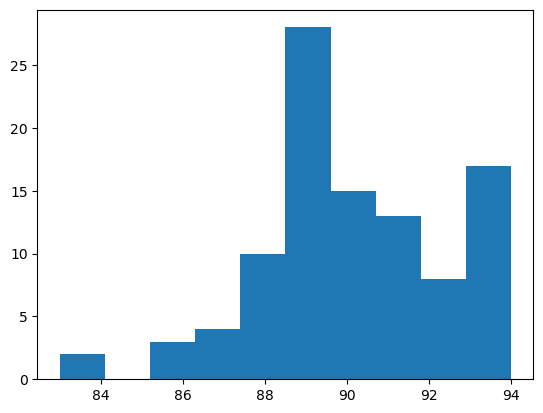

Generation: 26
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.98
Std Fitness: 2.1353219897710973


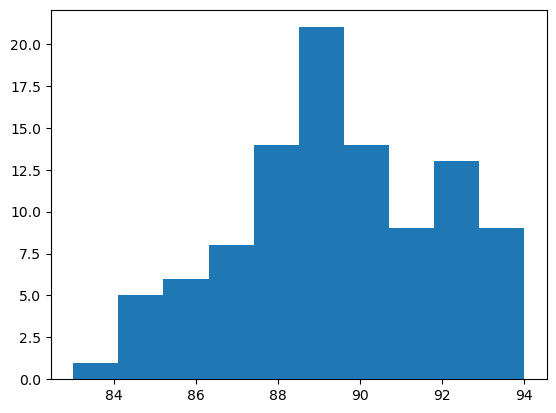

Generation: 27
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.35
Std Fitness: 2.308137777516758


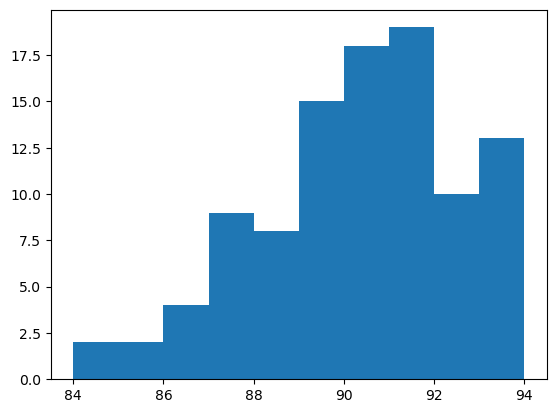

Generation: 28
Max Fitness: 94.0
Min Fitness: 84.0
Mean Fitness: 89.85
Std Fitness: 2.255548713727992


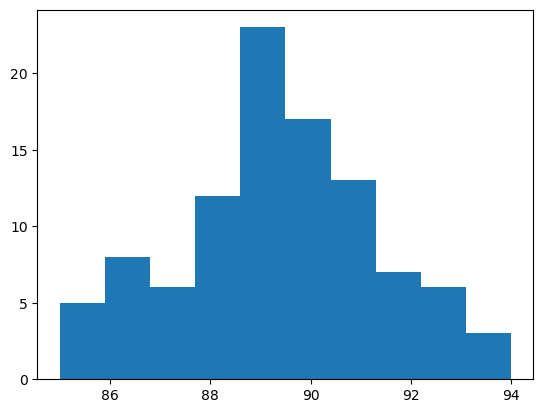

Generation: 29
Max Fitness: 94.0
Min Fitness: 85.0
Mean Fitness: 89.35
Std Fitness: 2.1880356487041066


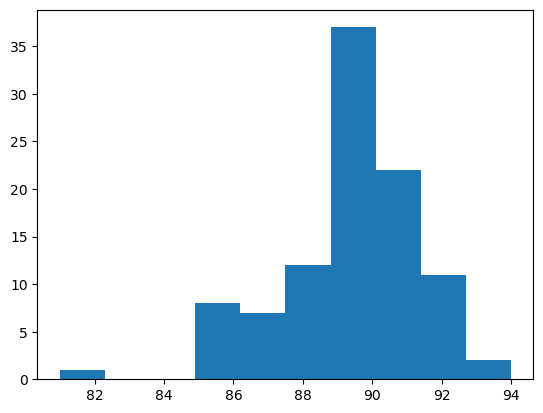

Generation: 30
Max Fitness: 94.0
Min Fitness: 81.0
Mean Fitness: 89.47
Std Fitness: 2.0418374078265877


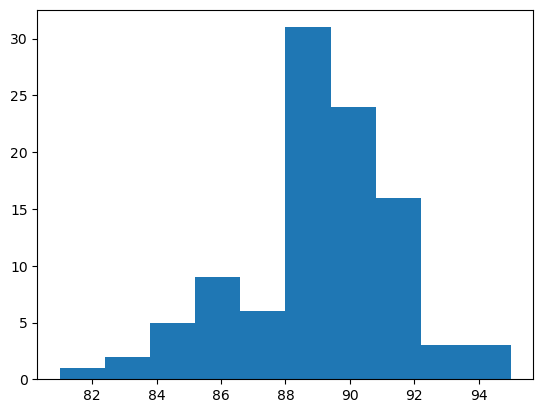

Generation: 31
Max Fitness: 95.0
Min Fitness: 81.0
Mean Fitness: 88.87
Std Fitness: 2.4480808810168013


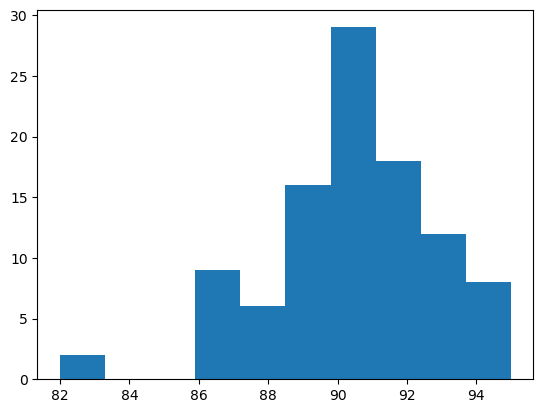

Generation: 32
Max Fitness: 95.0
Min Fitness: 82.0
Mean Fitness: 90.44
Std Fitness: 2.3929897617833635


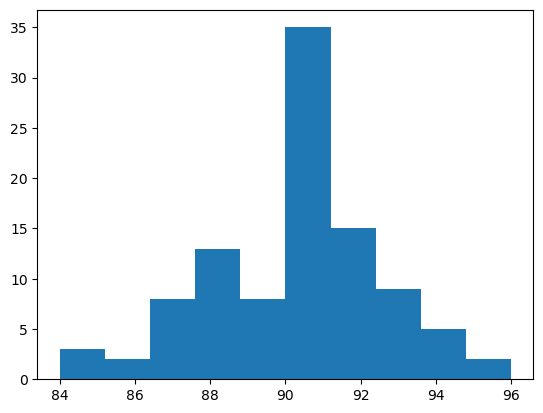

Generation: 33
Max Fitness: 96.0
Min Fitness: 84.0
Mean Fitness: 90.25
Std Fitness: 2.3339880033967613


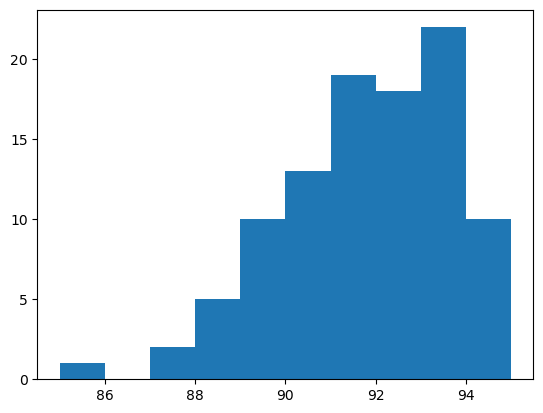

Generation: 34
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 91.31
Std Fitness: 1.8957584234284701


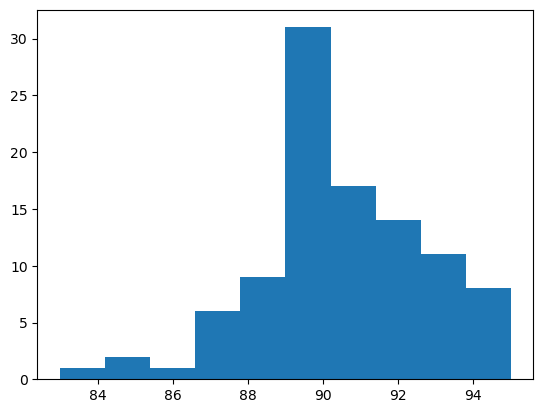

Generation: 35
Max Fitness: 95.0
Min Fitness: 83.0
Mean Fitness: 90.43
Std Fitness: 2.27268563598224


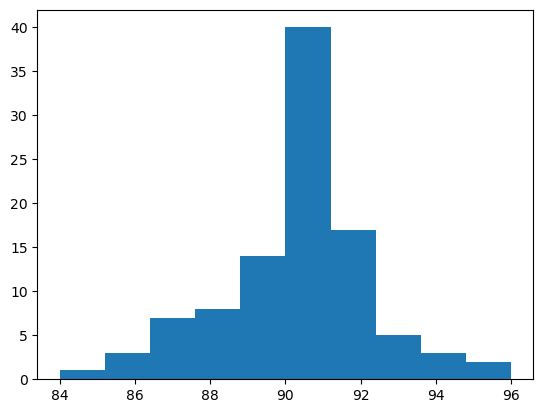

Generation: 36
Max Fitness: 96.0
Min Fitness: 84.0
Mean Fitness: 90.25
Std Fitness: 2.075451758051726


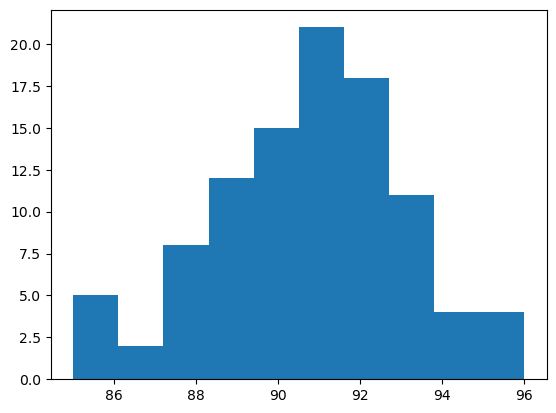

Generation: 37
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 90.72
Std Fitness: 2.2049036260118036


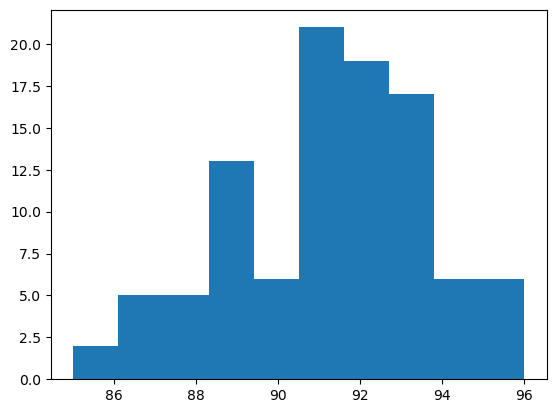

Generation: 38
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 91.19
Std Fitness: 2.22573583338185


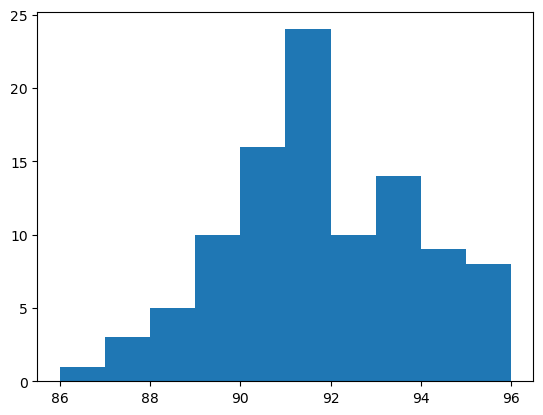

Generation: 39
Max Fitness: 96.0
Min Fitness: 86.0
Mean Fitness: 91.31
Std Fitness: 2.1386678096422544


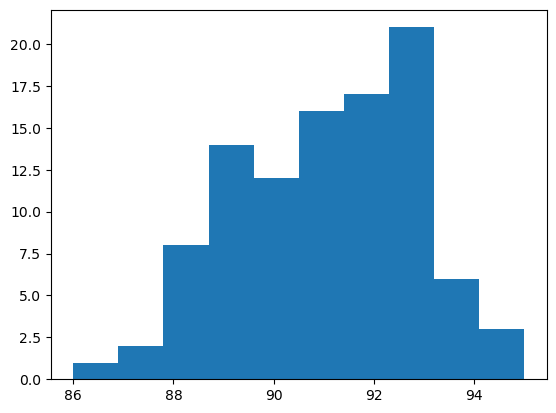

Generation: 40
Max Fitness: 95.0
Min Fitness: 86.0
Mean Fitness: 91.12
Std Fitness: 1.9963967541548453


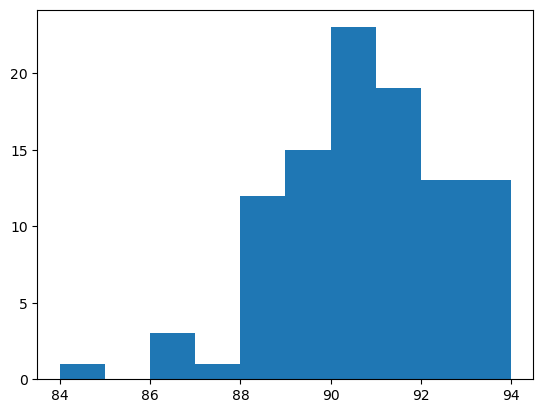

Generation: 41
Max Fitness: 94.0
Min Fitness: 84.0
Mean Fitness: 90.27
Std Fitness: 1.891322288770478


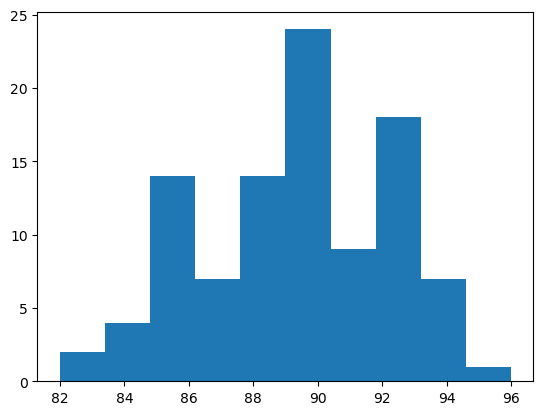

Generation: 42
Max Fitness: 96.0
Min Fitness: 82.0
Mean Fitness: 89.26
Std Fitness: 2.9651981384049195


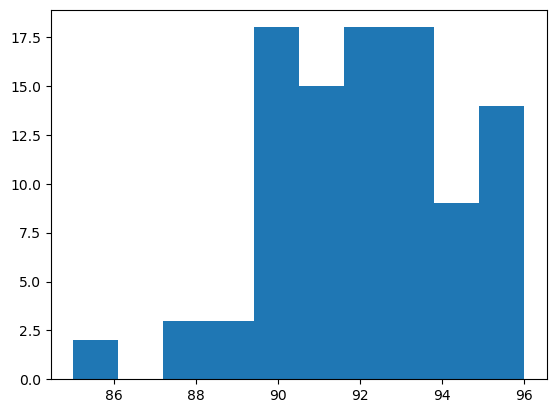

Generation: 43
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 91.95
Std Fitness: 2.0994046775217017


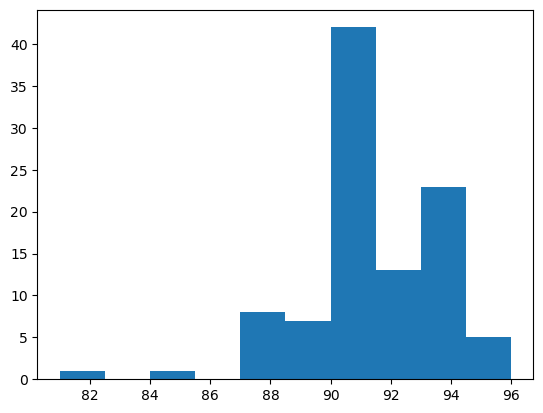

Generation: 44
Max Fitness: 96.0
Min Fitness: 81.0
Mean Fitness: 91.03
Std Fitness: 2.251466188953323


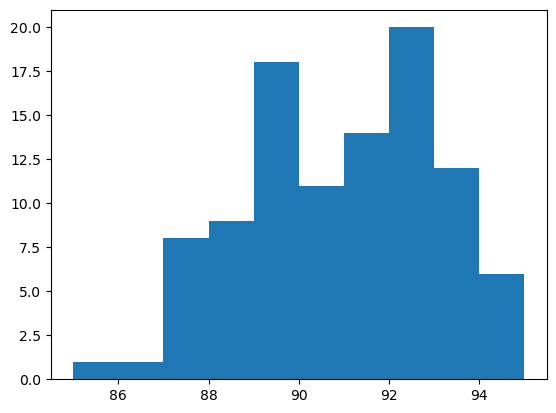

Generation: 45
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 90.47
Std Fitness: 2.146881459233369


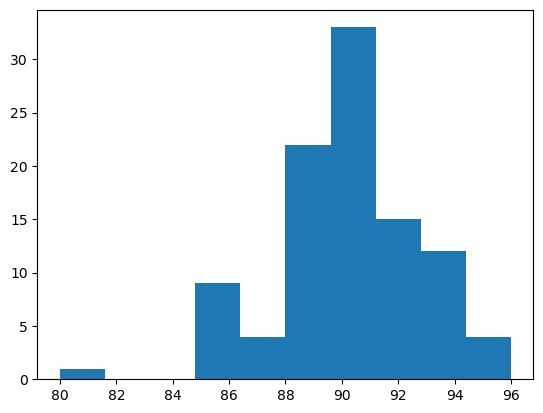

Generation: 46
Max Fitness: 96.0
Min Fitness: 80.0
Mean Fitness: 90.15
Std Fitness: 2.570505786805391


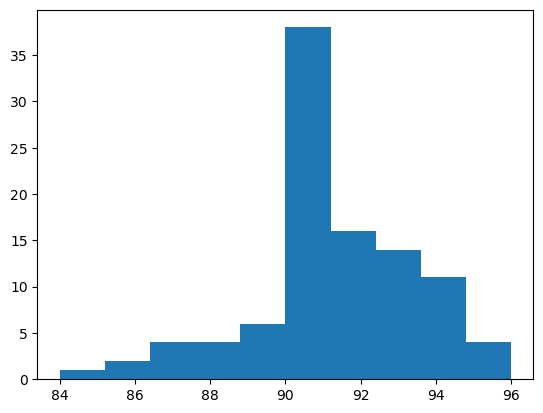

Generation: 47
Max Fitness: 96.0
Min Fitness: 84.0
Mean Fitness: 91.25
Std Fitness: 2.17428149051589


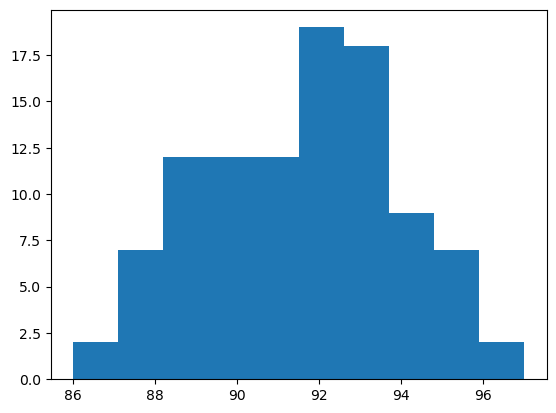

Generation: 48
Max Fitness: 97.0
Min Fitness: 86.0
Mean Fitness: 91.55
Std Fitness: 2.188035648704106


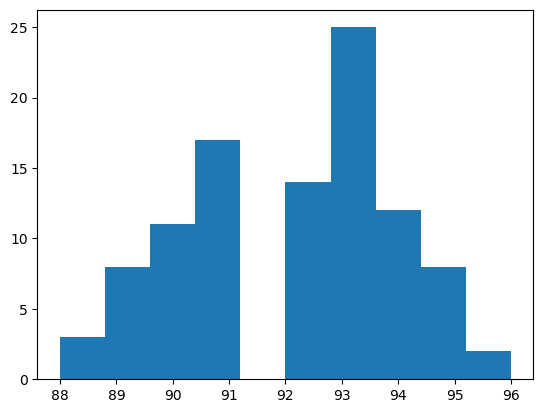

Generation: 49
Max Fitness: 96.0
Min Fitness: 88.0
Mean Fitness: 92.06
Std Fitness: 1.891137224000416


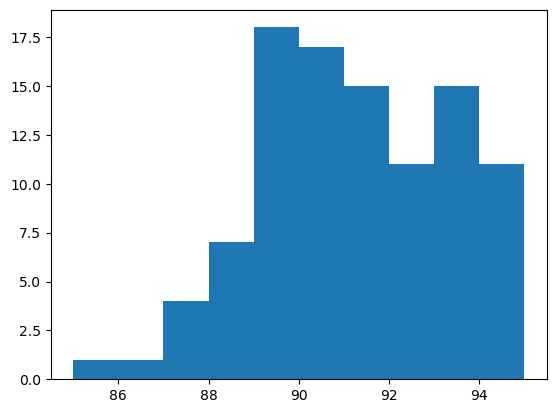

Generation: 50
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 90.78
Std Fitness: 2.1843992309099547


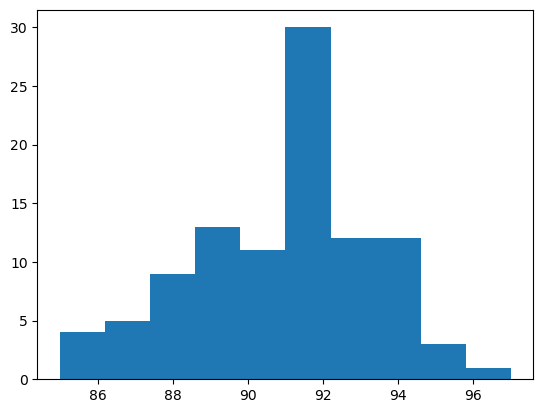

Generation: 51
Max Fitness: 97.0
Min Fitness: 85.0
Mean Fitness: 90.9
Std Fitness: 2.4310491562286436


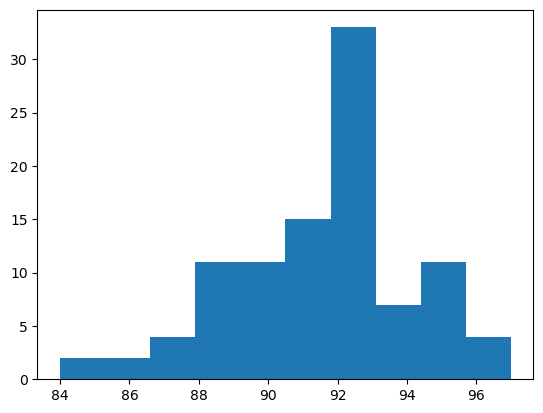

Generation: 52
Max Fitness: 97.0
Min Fitness: 84.0
Mean Fitness: 91.58
Std Fitness: 2.5852659437667147


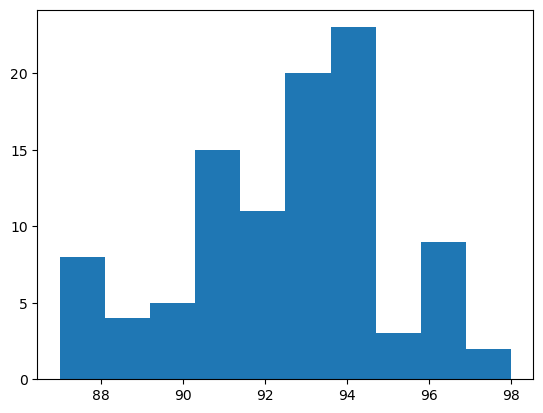

Generation: 53
Max Fitness: 98.0
Min Fitness: 87.0
Mean Fitness: 92.52
Std Fitness: 2.29120055865915


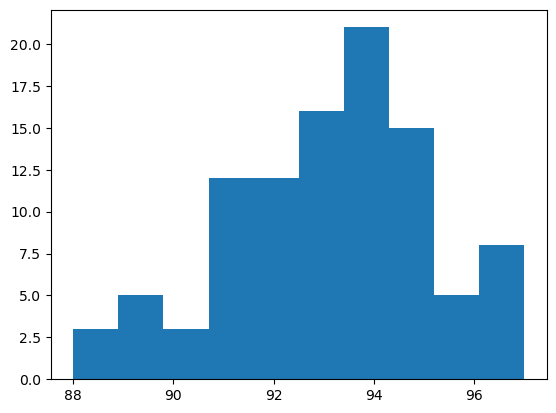

Generation: 54
Max Fitness: 97.0
Min Fitness: 88.0
Mean Fitness: 93.18
Std Fitness: 2.2198198125073123


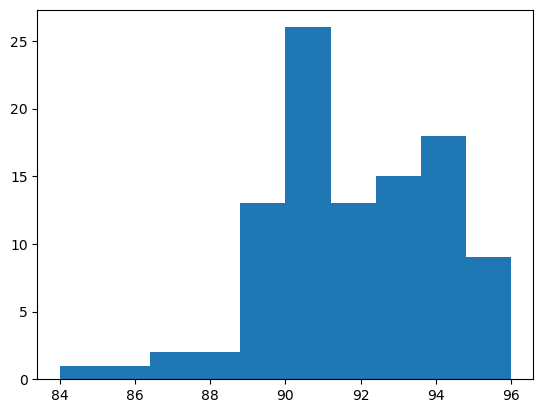

Generation: 55
Max Fitness: 96.0
Min Fitness: 84.0
Mean Fitness: 91.67
Std Fitness: 2.311081997679875


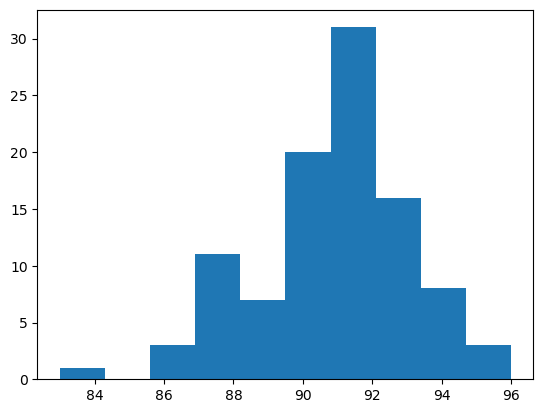

Generation: 56
Max Fitness: 96.0
Min Fitness: 83.0
Mean Fitness: 90.92
Std Fitness: 2.2877062748526087


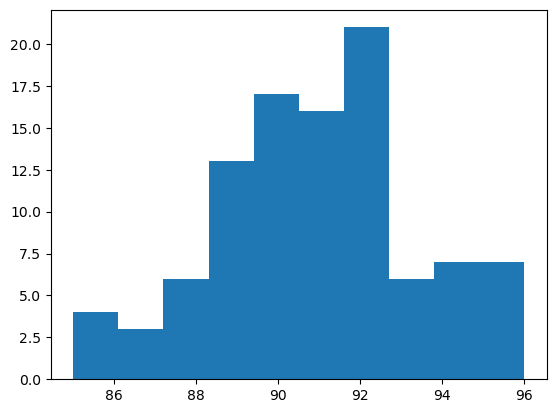

Generation: 57
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 90.9
Std Fitness: 2.2781571499789037


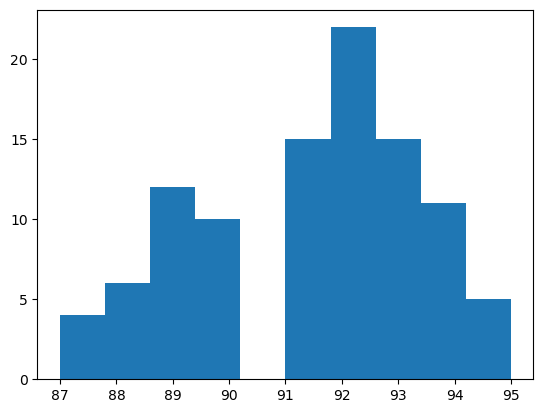

Generation: 58
Max Fitness: 95.0
Min Fitness: 87.0
Mean Fitness: 91.37
Std Fitness: 2.0574498778828127


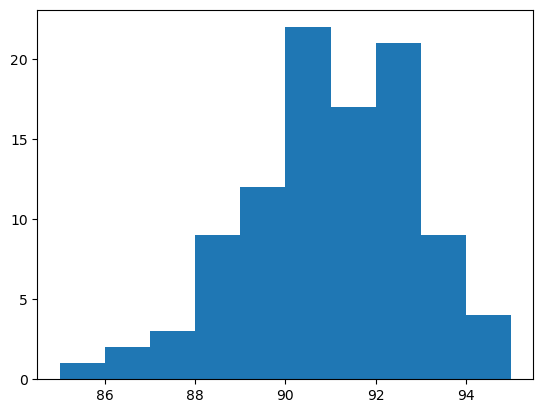

Generation: 59
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 90.51
Std Fitness: 1.899973684028282


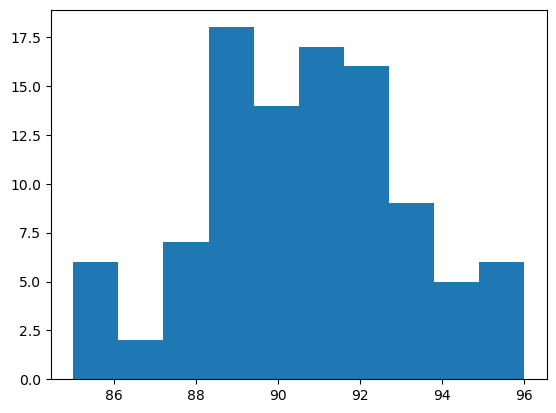

Generation: 60
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 90.64
Std Fitness: 2.3474241201793933


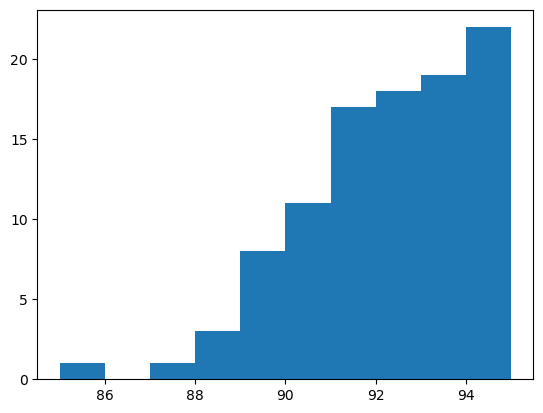

Generation: 61
Max Fitness: 95.0
Min Fitness: 85.0
Mean Fitness: 91.83
Std Fitness: 1.9852203907878843


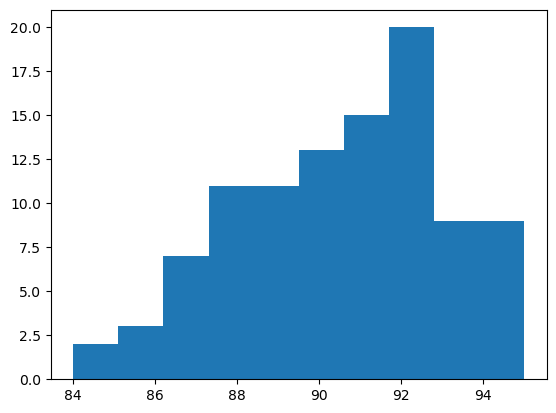

Generation: 62
Max Fitness: 95.0
Min Fitness: 84.0
Mean Fitness: 90.44
Std Fitness: 2.35507961648858


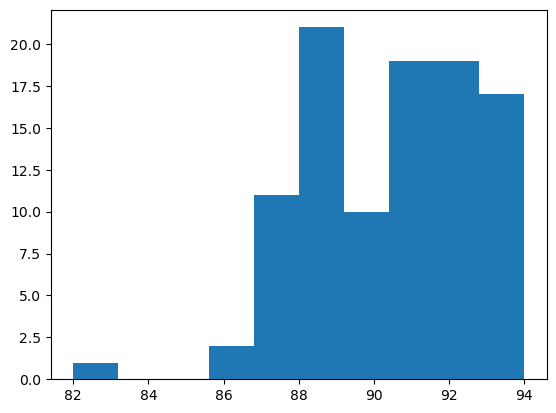

Generation: 63
Max Fitness: 94.0
Min Fitness: 82.0
Mean Fitness: 90.28
Std Fitness: 2.249799991110321


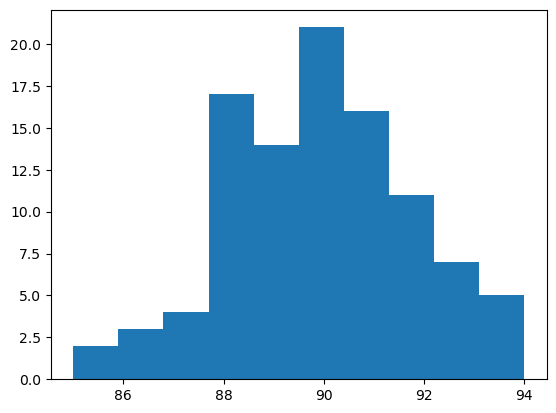

Generation: 64
Max Fitness: 94.0
Min Fitness: 85.0
Mean Fitness: 89.97
Std Fitness: 2.046729097853451


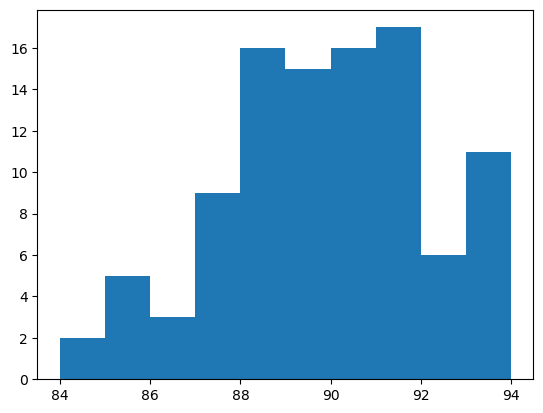

Generation: 65
Max Fitness: 94.0
Min Fitness: 84.0
Mean Fitness: 89.44
Std Fitness: 2.342306555513176


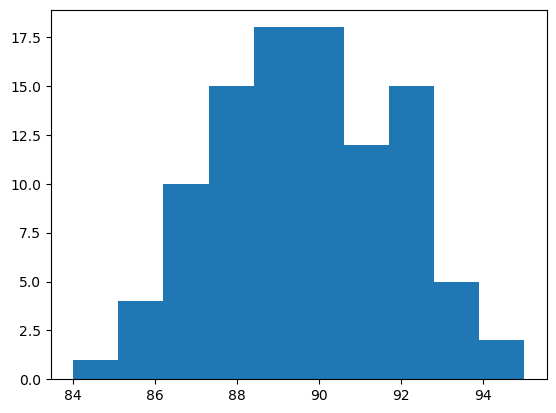

Generation: 66
Max Fitness: 95.0
Min Fitness: 84.0
Mean Fitness: 89.66
Std Fitness: 2.035779948815687


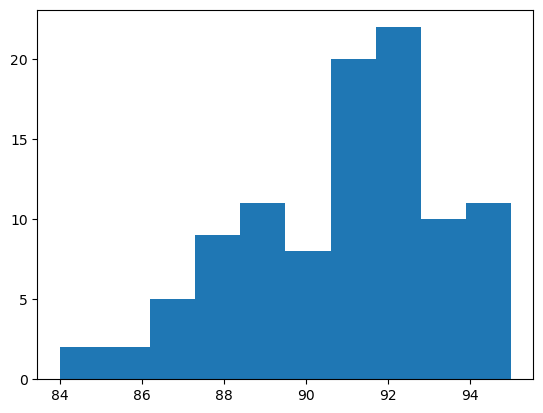

Generation: 67
Max Fitness: 95.0
Min Fitness: 84.0
Mean Fitness: 90.78
Std Fitness: 2.334866163187946


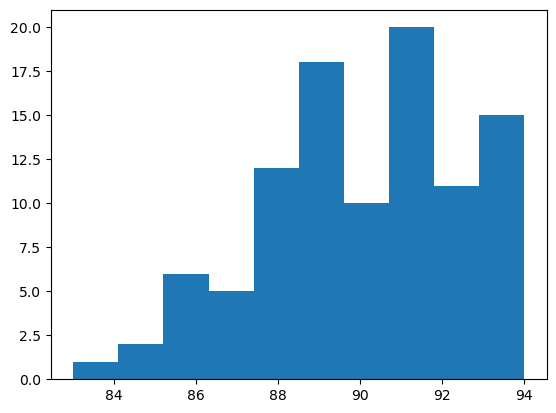

Generation: 68
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.93
Std Fitness: 2.3076178193106416


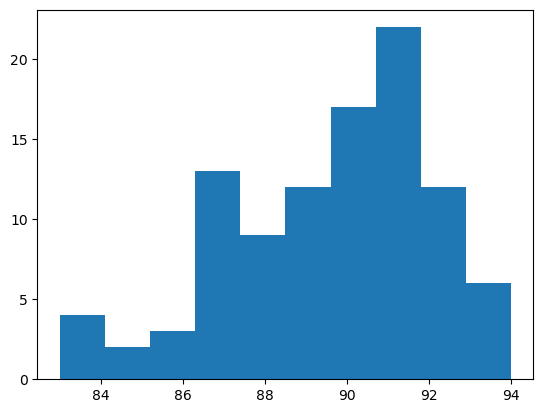

Generation: 69
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 89.49
Std Fitness: 2.2912660255849824


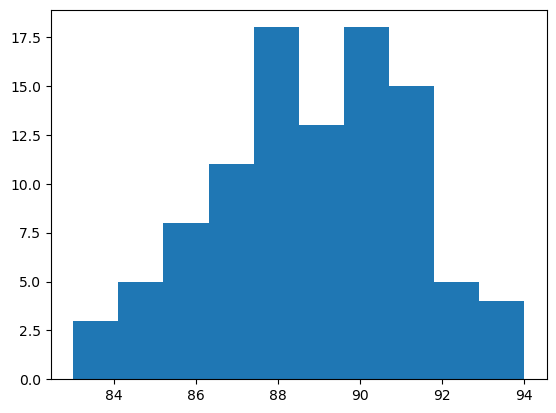

Generation: 70
Max Fitness: 94.0
Min Fitness: 83.0
Mean Fitness: 88.8
Std Fitness: 2.2181073012818833


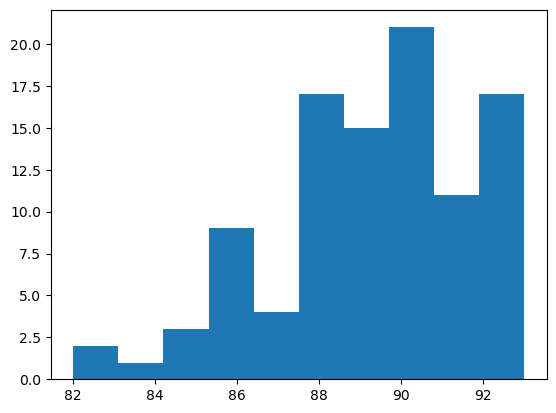

Generation: 71
Max Fitness: 93.0
Min Fitness: 82.0
Mean Fitness: 89.18
Std Fitness: 2.299478201679677


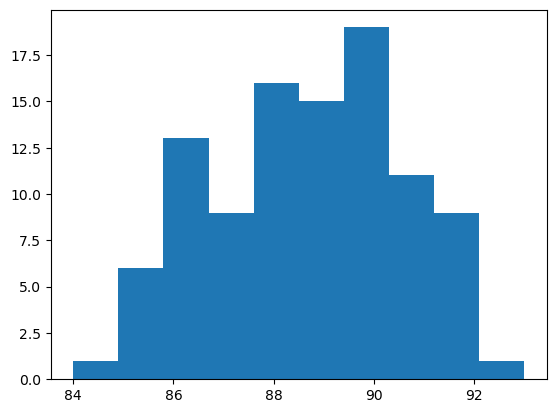

Generation: 72
Max Fitness: 93.0
Min Fitness: 84.0
Mean Fitness: 88.7
Std Fitness: 2.0999999999999996


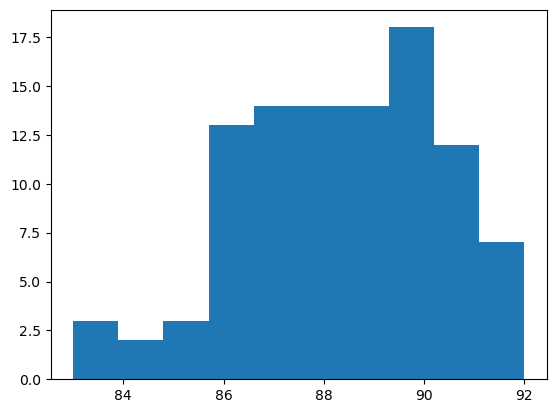

Generation: 73
Max Fitness: 92.0
Min Fitness: 83.0
Mean Fitness: 88.42
Std Fitness: 2.209886874932742


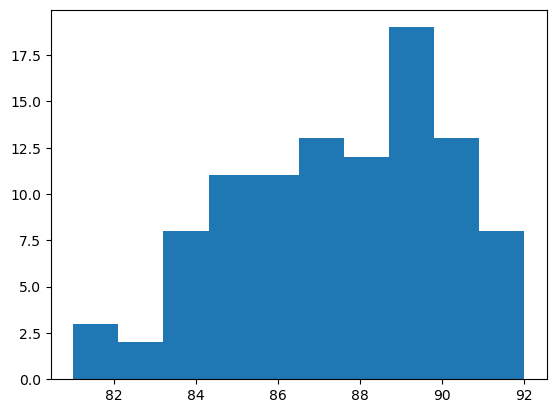

Generation: 74
Max Fitness: 92.0
Min Fitness: 81.0
Mean Fitness: 87.41
Std Fitness: 2.387865155321799


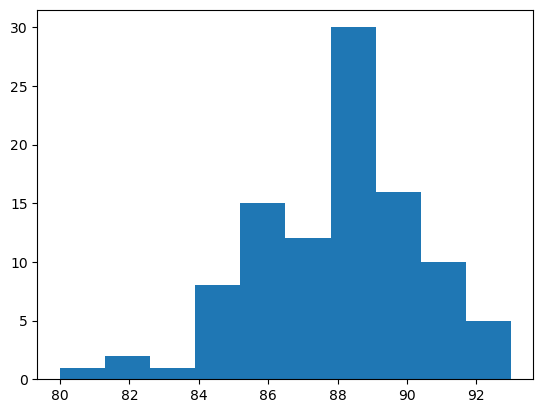

Generation: 75
Max Fitness: 93.0
Min Fitness: 80.0
Mean Fitness: 88.02
Std Fitness: 2.395746230300697


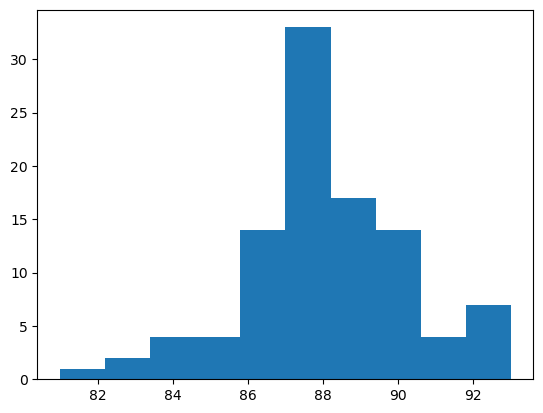

Generation: 76
Max Fitness: 93.0
Min Fitness: 81.0
Mean Fitness: 88.02
Std Fitness: 2.2714752915231102


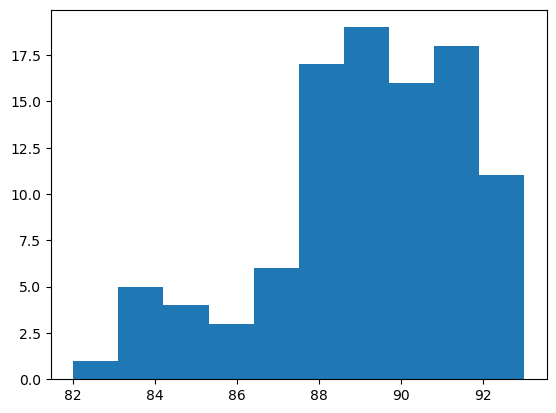

Generation: 77
Max Fitness: 93.0
Min Fitness: 82.0
Mean Fitness: 89.03
Std Fitness: 2.2823452850083834


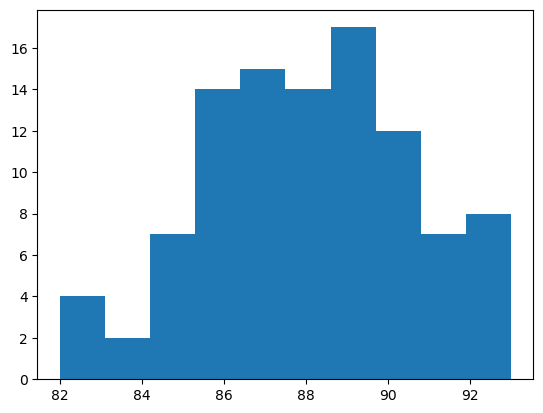

Generation: 78
Max Fitness: 93.0
Min Fitness: 82.0
Mean Fitness: 88.04
Std Fitness: 2.3660938273872407


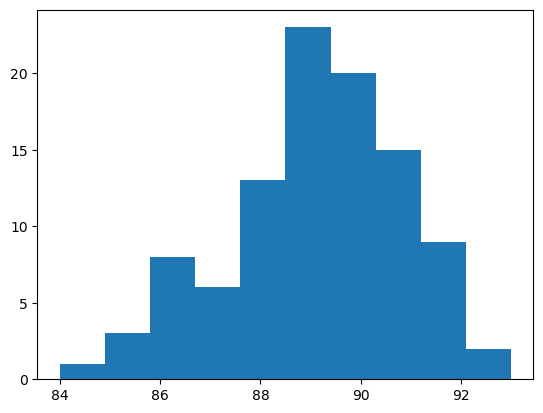

Generation: 79
Max Fitness: 93.0
Min Fitness: 84.0
Mean Fitness: 89.19
Std Fitness: 1.9271481520630422


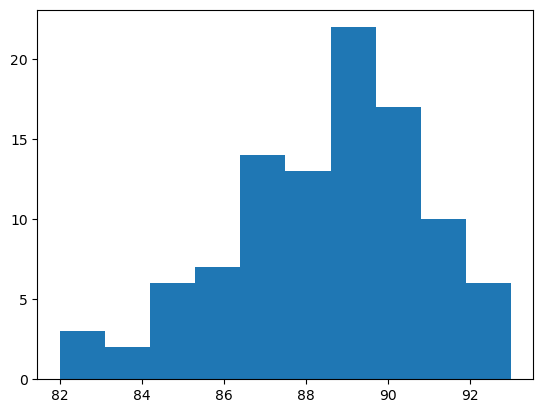

Generation: 80
Max Fitness: 93.0
Min Fitness: 82.0
Mean Fitness: 88.42
Std Fitness: 2.2144073699299325


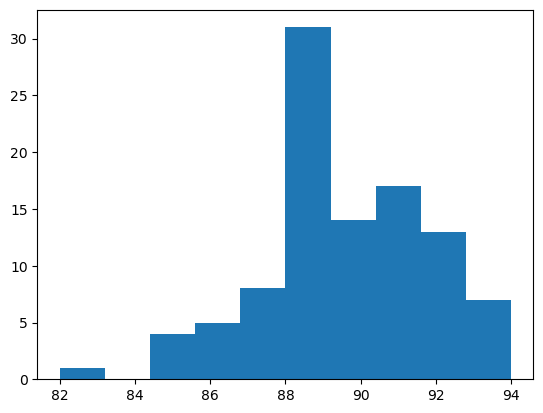

Generation: 81
Max Fitness: 94.0
Min Fitness: 82.0
Mean Fitness: 89.47
Std Fitness: 2.2867225454785722


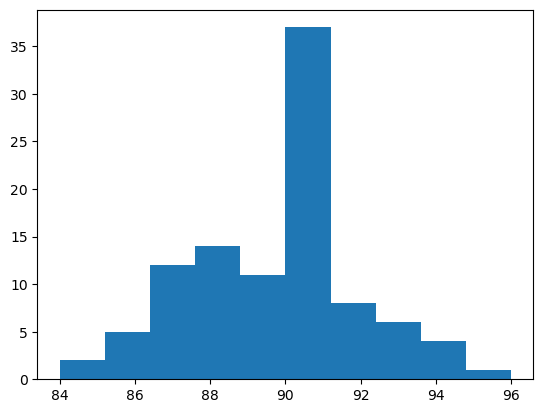

Generation: 82
Max Fitness: 96.0
Min Fitness: 84.0
Mean Fitness: 89.71
Std Fitness: 2.2684576257889413


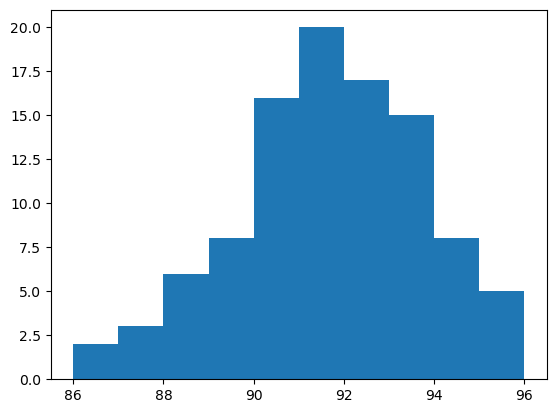

Generation: 83
Max Fitness: 96.0
Min Fitness: 86.0
Mean Fitness: 91.22
Std Fitness: 2.1240527300422656


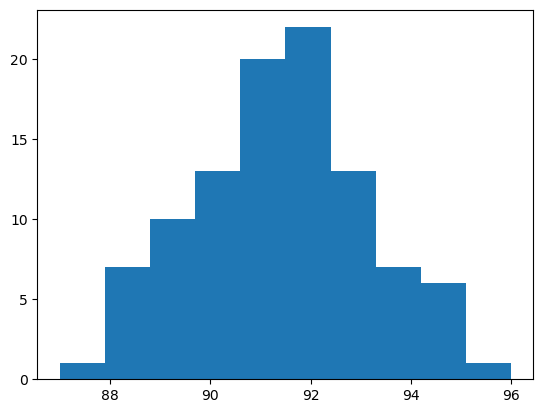

Generation: 84
Max Fitness: 96.0
Min Fitness: 87.0
Mean Fitness: 91.4
Std Fitness: 1.9339079605813716


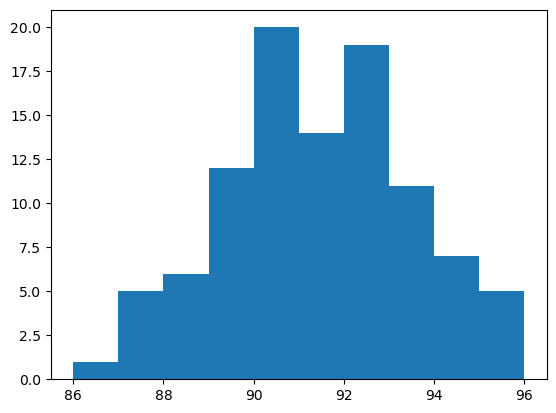

Generation: 85
Max Fitness: 96.0
Min Fitness: 86.0
Mean Fitness: 90.97
Std Fitness: 2.123464150862924


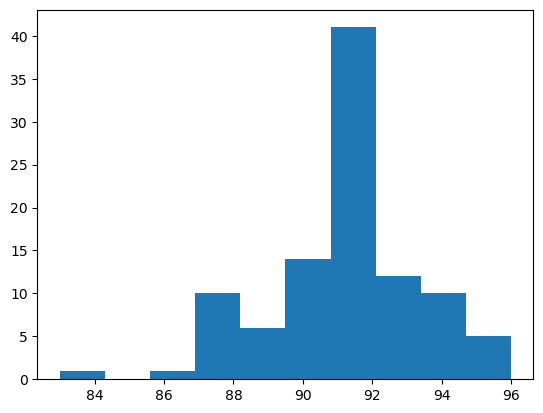

Generation: 86
Max Fitness: 96.0
Min Fitness: 83.0
Mean Fitness: 91.2
Std Fitness: 2.2045407685048604


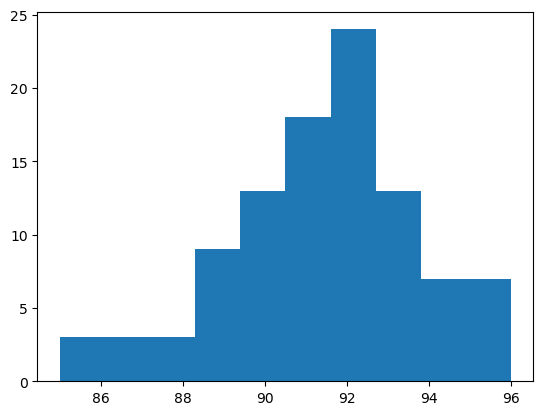

Generation: 87
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 91.33
Std Fitness: 2.163584987930911


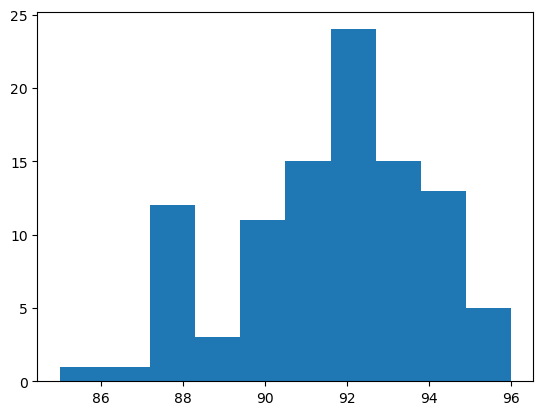

Generation: 88
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 91.51
Std Fitness: 2.114213801865838


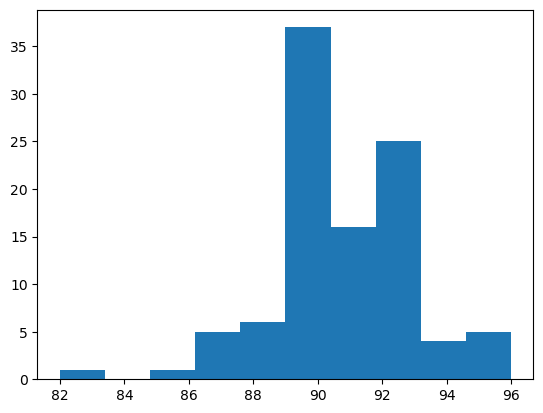

Generation: 89
Max Fitness: 96.0
Min Fitness: 82.0
Mean Fitness: 90.66
Std Fitness: 2.241517343229804


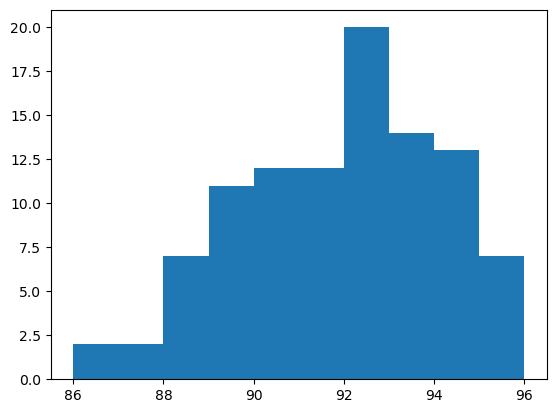

Generation: 90
Max Fitness: 96.0
Min Fitness: 86.0
Mean Fitness: 91.44
Std Fitness: 2.2464193731358355


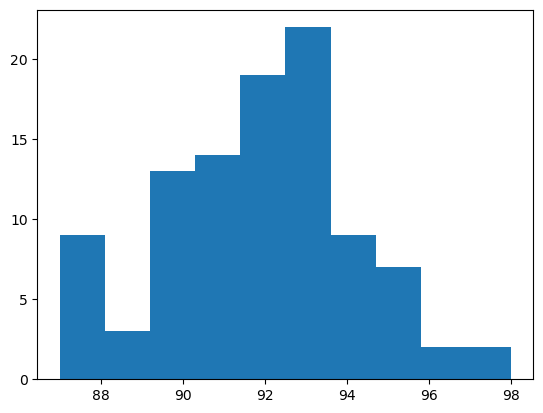

Generation: 91
Max Fitness: 98.0
Min Fitness: 87.0
Mean Fitness: 91.91
Std Fitness: 2.2049716551466143


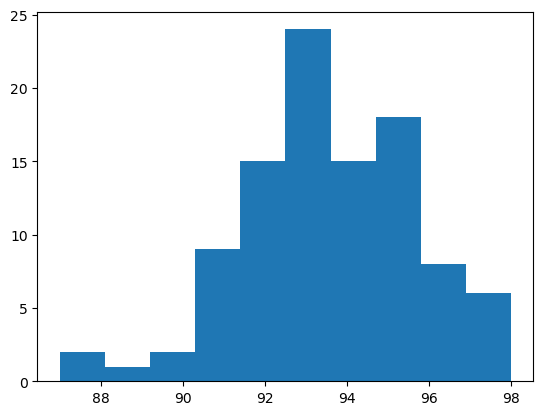

Generation: 92
Max Fitness: 98.0
Min Fitness: 87.0
Mean Fitness: 93.48
Std Fitness: 2.0123617964968425


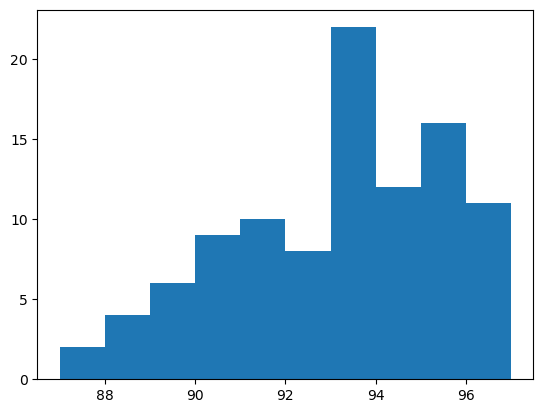

Generation: 93
Max Fitness: 97.0
Min Fitness: 87.0
Mean Fitness: 92.7
Std Fitness: 2.4310491562286436


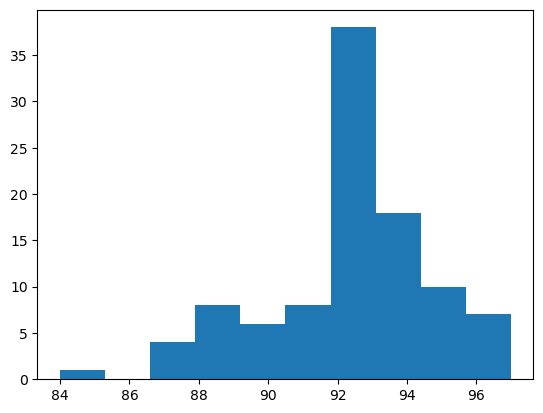

Generation: 94
Max Fitness: 97.0
Min Fitness: 84.0
Mean Fitness: 92.41
Std Fitness: 2.449877547960306


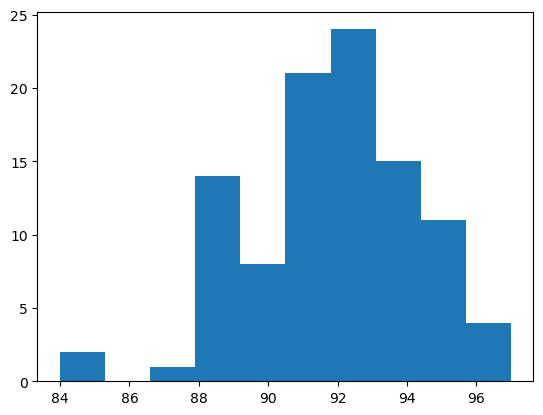

Generation: 95
Max Fitness: 97.0
Min Fitness: 84.0
Mean Fitness: 91.9
Std Fitness: 2.4433583445741234


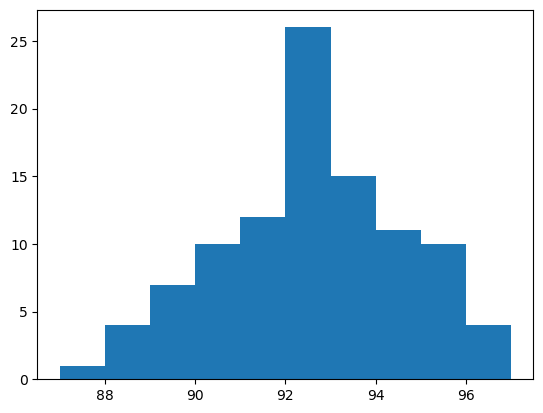

Generation: 96
Max Fitness: 97.0
Min Fitness: 87.0
Mean Fitness: 92.1
Std Fitness: 2.06155281280883


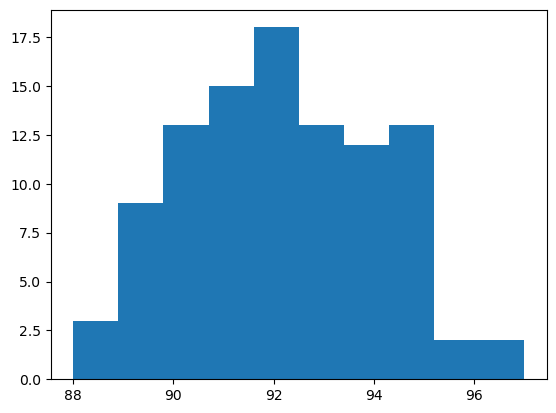

Generation: 97
Max Fitness: 97.0
Min Fitness: 88.0
Mean Fitness: 92.14
Std Fitness: 2.130821437849732


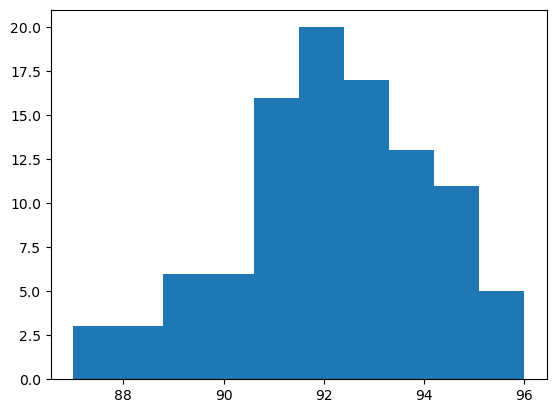

Generation: 98
Max Fitness: 96.0
Min Fitness: 87.0
Mean Fitness: 92.23
Std Fitness: 2.144084886379268


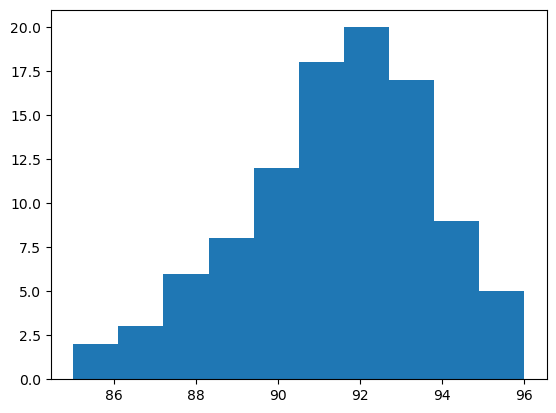

Generation: 99
Max Fitness: 96.0
Min Fitness: 85.0
Mean Fitness: 91.33
Std Fitness: 2.1309856874226067


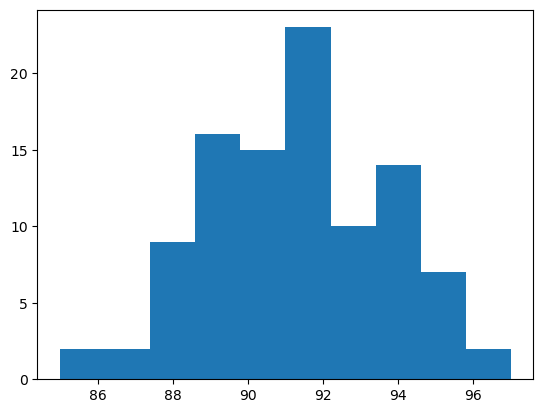

Generation: 100
Max Fitness: 97.0
Min Fitness: 85.0
Mean Fitness: 91.17
Std Fitness: 2.4700404854981626


In [16]:
pop = np.random.randint(0, 2, size=(POPULATION, GENES))

for i in range(GENERATIONS):
    pop = simple_ga(pop)
    
    fitness = np.sum(pop, axis=1)
    
    plt.hist(fitness)
    
    plt.show()
    
    print('Generation:', i + 1)
    print('Max Fitness:', np.max(fitness))
    print('Min Fitness:', np.min(fitness))
    print('Mean Fitness:', np.mean(fitness))
    print('Std Fitness:', np.std(fitness))